# Gradient methods

In [3]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [4]:
def Booth_function(X):
    y=(X[0]+(2*X[1])-7)**2+((2*X[0])+X[1]-5)**2
    return y

In [5]:
def dx(X):
    dx=(X[0]+(2*X[1])-7)*2+((2*X[0])+X[1]-5)*4
    return dx
def dy(X):
    dy=(X[0]+(2*X[1])-7)*4+((2*X[0])+X[1]-5)*2
    return dy


## Gradient with Momentum

In [19]:
def momemntum_grad(init_para,function,epsilon):
    x=init_para[0]
    y=init_para[1]
    beta=random.random()
    alpha=random.random()
    vdx=vdb=0
    iter=0
    fval=[function([x,y])]
    while function(init_para)>epsilon and iter<200 :
        vdx=beta*vdx+(1-beta)*dx([x,y])
        vdb=beta*vdb+(1-beta)*dy([x,y])
        x=x-alpha*vdx
        y=y-alpha*vdb
        if iter%10==0:
            print('iter:',iter)
            print('The function vale',function([x,y]))
        fval.append(function([x,y]))
        iter+=1
    iterr=[i for i in range(201)]
    plt.figure(figsize=(8,8))
    plt.plot(iterr,fval)



iter: 0
The function vale 1055.2643235688129
iter: 10
The function vale 421.65998232712036
iter: 20
The function vale 95.64574626727327
iter: 30
The function vale 12.226397500976955
iter: 40
The function vale 0.47711054769255873
iter: 50
The function vale 0.050434655991714705
iter: 60
The function vale 0.11889080117482498
iter: 70
The function vale 0.05678141541811657
iter: 80
The function vale 0.014576529966803961
iter: 90
The function vale 0.002180943011663207
iter: 100
The function vale 0.00013150223189970677
iter: 110
The function vale 1.3151929063209537e-06
iter: 120
The function vale 1.2499145010694347e-05
iter: 130
The function vale 7.388992220436287e-06
iter: 140
The function vale 2.157725160863707e-06
iter: 150
The function vale 3.7115346454246404e-07
iter: 160
The function vale 3.038327827160461e-08
iter: 170
The function vale 4.914111781399304e-11
iter: 180
The function vale 1.194895242018893e-09
iter: 190
The function vale 9.256925320407427e-10


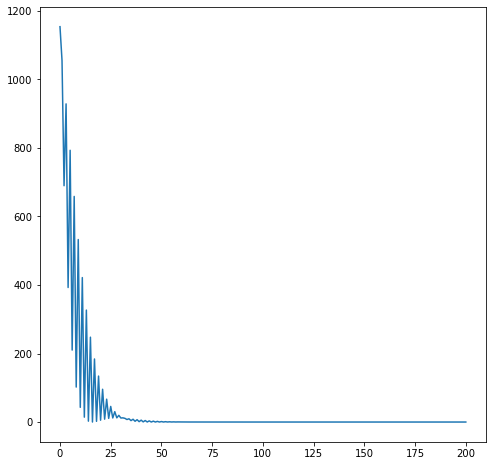

In [26]:
momemntum_grad([10,10],Booth_function,0.1)

## Adam Optimization

In [27]:
def Adam(init_para,function,epsilon):
    Vdw=Sdw=Vdb=Sdb=0
    iter=1
    x=init_para[0]
    y=init_para[1]
    B1=0.9
    B2=0.999
    alpha=random.random()
    f_val=[function([x,y])]
    def __momentum(Vdw,Vdb,dw,db,B1):
        Vdw=B1*Vdw+(1-B1)*dw
        Vdb=B1*Vdb+(1-B1)*db
        return Vdw,Vdb
    def __rmsProp(Sdw,Sdb,dw,db,B2):
        Sdw=B2*Sdw+(1-B2)*(dw**2)
        Sdb=B2*Sdb+(1-B2)*(db**2)
        return Sdw,Sdb
    def corrected_param(Vdw,Vdb,Sdw,Sdb,B1,B2):
        Vdw_corr=Vdw/(1-B1**iter)
        Vdb_corr=Vdw/(1-B1**iter)
        Sdw_corr=Sdw/(1-B2**iter)
        Sdb_corr=Sdb/(1-B2**iter)
        return Vdw_corr,Vdb_corr,Sdw_corr,Sdb_corr
    while iter<100:
        dw=dx([x,y])
        db=dy([x,y])
       
        Vdw,Vdb=__momentum(Vdw,Vdb,dw,db,B1)
        Sdw,Sdb=__rmsProp(Sdw,Sdb,dw,db,B2)
        Vdw_corr,Vdb_corr,Sdw_corr,Sdb_corr=corrected_param(Vdw,Vdb,Sdw,Sdb,B1,B2)
        
        x=x-alpha*(Vdw_corr/(math.sqrt(Sdw_corr)+epsilon))
        y=y-alpha*(Vdb_corr/(math.sqrt(Sdb_corr)+epsilon))
        if iter%10==0:
            print('iter:',iter)
            print('The function vale',function([x,y]))
        f_val.append(function([x,y]))
        iter+=1
    iterr=[i for i in range(100)]
    plt.figure(figsize=(10,10))
    plt.plot(iterr,f_val)

iter: 10
The function vale 48.04122191890003
iter: 20
The function vale 68.88318712295253
iter: 30
The function vale 29.08280408419382
iter: 40
The function vale 4.650717754653354
iter: 50
The function vale 4.41680479857559
iter: 60
The function vale 4.391494112929413
iter: 70
The function vale 4.035122636605112
iter: 80
The function vale 2.7576377900716267
iter: 90
The function vale 2.9213626878719023


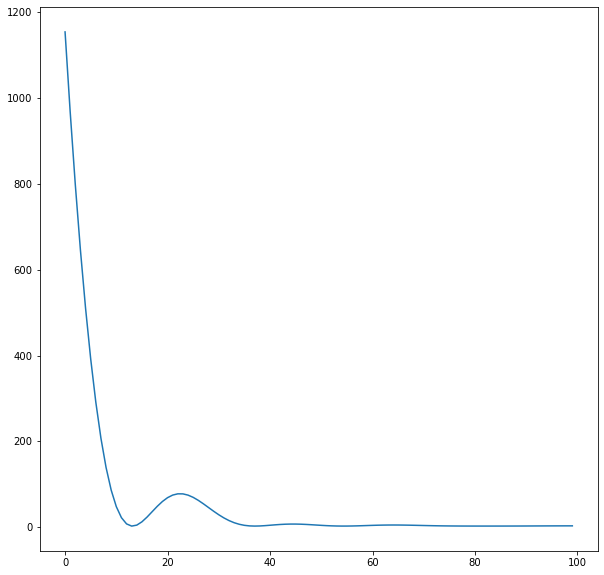

In [28]:
Adam([10,10],Booth_function,0.01)